# Classic PINN

## Training

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..", "")))

import torch
from src.data_generator.heat_equations import HeatEquationDataset
from src.train.train import train
from src.figures.figures import plot_sample
from src.models.basic import alpha_network, u_network
from src.loss_function.loss_function import Loss


# For PyTorch random
torch.manual_seed(45)

# Create Dataset
dataset = HeatEquationDataset(n_samples=1, nx=100, nt=100,T=100, L=1)

# Define PINNS
alpha_net = alpha_network(hidden_dim=16)
u_net = u_network(hidden_dim=16)

# training
u_net.train()
alpha_net.train()

lr = 1e-2
optimizer = torch.optim.Adam(list(u_net.parameters()) + list(alpha_net.parameters()), lr=lr)
loss = Loss(pde_coefficient=10, alpha_reg_coefficient=5)
train(
    loss_function=loss,
    optimizer=optimizer,
    dataset=dataset,
    u_net=u_net,
    alpha_net=alpha_net,
    epochs=3000
)


Epoch 0: Loss = 2.0514e+00
Epoch 20: Loss = 1.6798e-01
Epoch 40: Loss = 7.7631e-02
Epoch 60: Loss = 6.6776e-02
Epoch 80: Loss = 6.4680e-02
Epoch 100: Loss = 6.3806e-02
Epoch 120: Loss = 6.3074e-02
Epoch 140: Loss = 6.2553e-02
Epoch 160: Loss = 6.2260e-02
Epoch 180: Loss = 6.2112e-02
Epoch 200: Loss = 6.2020e-02
Epoch 220: Loss = 6.1951e-02
Epoch 240: Loss = 6.1893e-02
Epoch 260: Loss = 6.1842e-02
Epoch 280: Loss = 6.1796e-02
Epoch 300: Loss = 6.1754e-02
Epoch 320: Loss = 6.1716e-02
Epoch 340: Loss = 6.1682e-02
Epoch 360: Loss = 6.1652e-02
Epoch 380: Loss = 6.1627e-02
Epoch 400: Loss = 6.1604e-02
Epoch 420: Loss = 6.1585e-02
Epoch 440: Loss = 6.1568e-02
Epoch 460: Loss = 6.1553e-02
Epoch 480: Loss = 6.1540e-02
Epoch 500: Loss = 6.1528e-02
Epoch 520: Loss = 6.1517e-02
Epoch 540: Loss = 6.1507e-02
Epoch 560: Loss = 6.1498e-02
Epoch 580: Loss = 6.1490e-02
Epoch 600: Loss = 6.1481e-02
Epoch 620: Loss = 6.1474e-02
Epoch 640: Loss = 6.1466e-02
Epoch 660: Loss = 6.1459e-02
Epoch 680: Loss = 6.

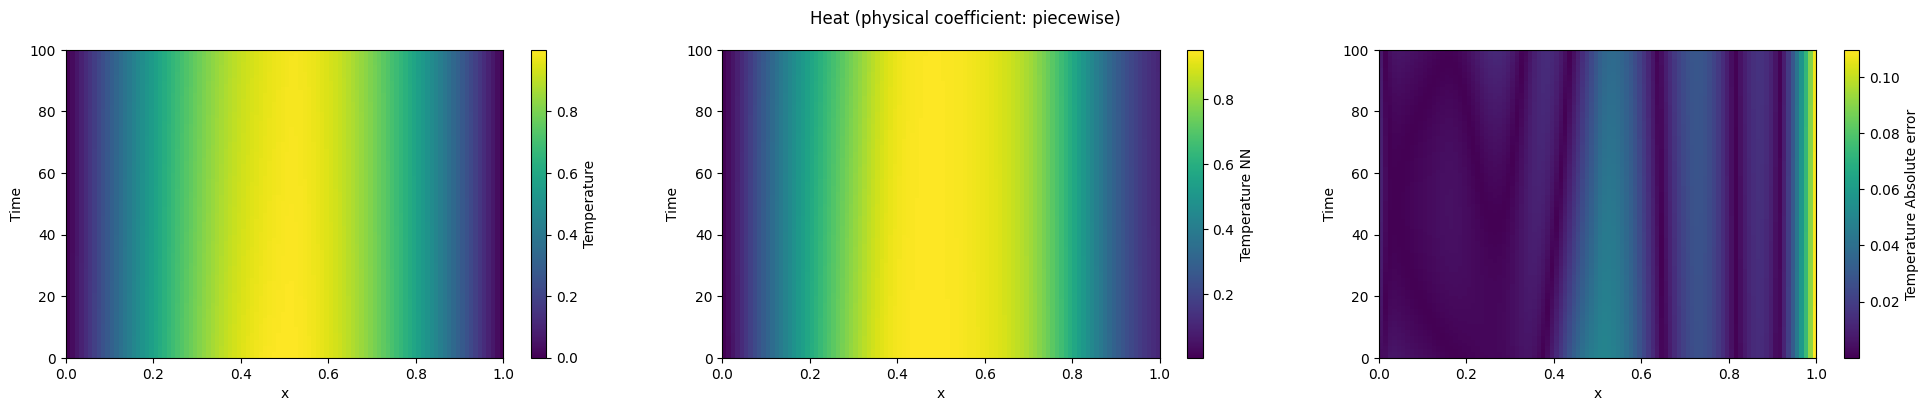

In [3]:
# plot
u_net.eval()
alpha_net.eval()
sample = dataset[0]

u_xt = u_net(xt=sample['xt'])
plot_sample(sample, u_xt, xt_pred_mesh=sample)

# phys_coeff_pred = alpha_net(x=sample['x'])
# phys_coeff_pred_repeated = phys_coeff_pred.repeat(1, sample["nt"]).flatten().unsqueeze(1)
# xt_alpha = torch.cat([sample['xt'], phys_coeff_pred_repeated], dim=1)
# u_xt = u_net(xtalpha=xt_alpha)
# plot_sample(sample, u_xt, xt_pred_mesh=sample)

## Predict Out-Of-Domain

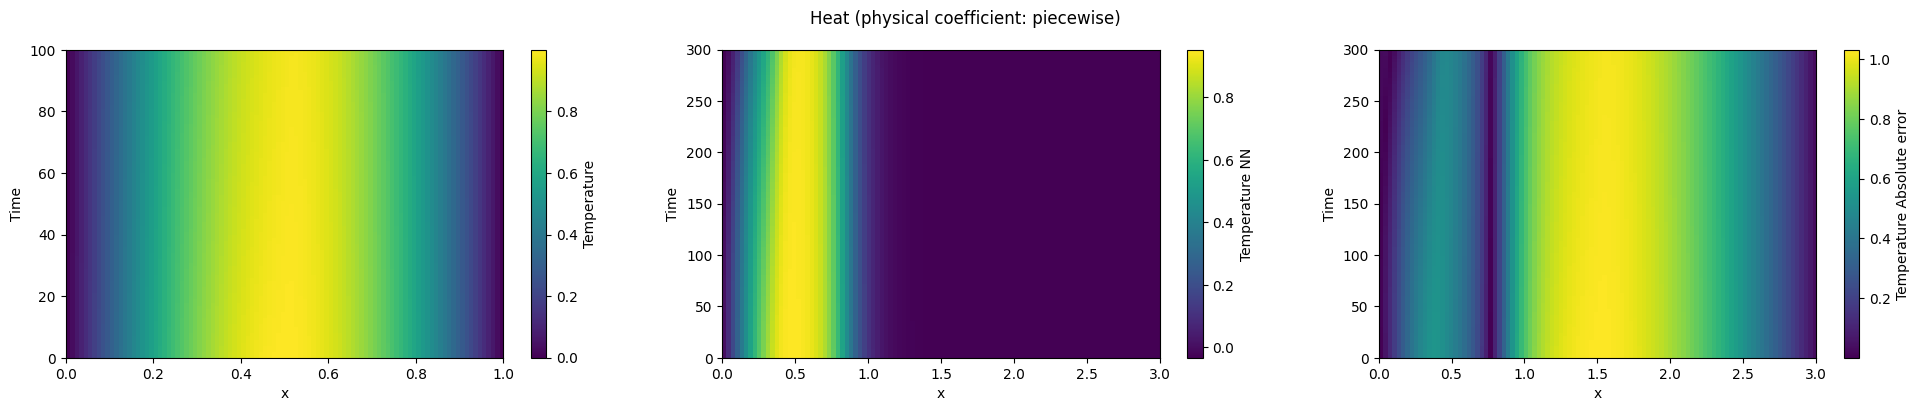

In [6]:
from src.data_generator.mesh_grid import generate_mesh_grid

alpha_x = sample['alpha']
out_of_domain_factor = 3
ood_mesh = generate_mesh_grid(
    alpha_x=sample['alpha'], 
    nx=sample['nx'], 
    nt=sample['nt'], 
    L=sample['L']*out_of_domain_factor, 
    T=sample['T']*out_of_domain_factor
)

u_xt_ood = u_net(xt=ood_mesh["xt"])
plot_sample(sample, u_xt_ood, ood_mesh)

# JEPA PINN

In [ ]:
sample['dt']

4.5913682277318646e-05